In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import math 
import random
import numba
from numba import jit
import copy

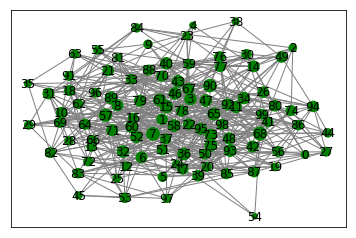

In [3]:
import generator
from generator import generateG

n=100
G=generateG(n)
nx.draw_networkx(G,node_color='green',edge_color='grey',node_size=[10*G.degree[i] for i in range(n)])
plt.show()

In [24]:
M=20000
alpha=1.5
omega=1
rho0=0.3
mu=1
p3e=0.6

import analyzeG
anre=analyzeG.analyze(G,n,alpha,omega,p3e)
beta1=anre[0]
beta2=anre[1]
twobody=anre[2]
threebody=anre[3]

beta1,beta2

(0.1482213438735178, 0.20576131687242796)

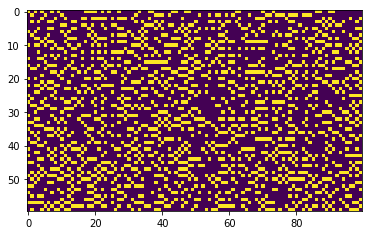

In [25]:
import getMatrix
PSI=getMatrix.getPSI(M,n,G,threebody,beta1,beta2,mu,rho0,t=0)
plt.imshow(PSI[0:60,:])
plt.show()

In [26]:
Pt=getMatrix.getPt(PSI,n,M)

In [27]:
import index
S1=index.index_step1(M,n,PSI,Pt,times=0,TM=200)
P1=S1[0]
eps=S1[1]
rhoe=S1[2]
rho1=S1[3]

In [28]:
import generator
delta_hat=generator.threshold1(n,P1)

In [29]:
G_hat=generator.generateG_hat(n,P1,delta_hat)

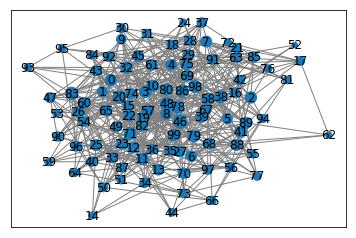

In [30]:
nx.draw_networkx(G_hat,edge_color='grey',node_size=[10*G.degree[i] for i in range(n)])
plt.show()

In [31]:
TP1=0
TN1=0
FP1=0
FN1=0
for i in range(n):
    for j in range (i,n):
        if (i,j) in set(G_hat.edges)&set(G.edges):
            TP1=TP1+1
        elif (i,j) in set(G_hat.edges):
            FP1=FP1+1
        elif (i,j) in set(G.edges):
            FN1=FN1+1
        else:
            TN1=TN1+1

PS1=TP1/(TP1+FP1)
RS1=TP1/(TP1+FN1)
F11=2*PS1*RS1/(PS1+RS1)
print(f'TP:{TP1},TN:{TN1},FP:{FP1},FN:{FN1},F1:{F11}')

TP:506,TN:4544,FP:0,FN:0,F1:1.0


In [32]:
import F1s
F11=F1s.F1(G,G_hat,n,TP1=0,TN1=0,FP1=0,FN1=0)
F11

1.0

In [33]:
anre1=analyzeG.analyze(G_hat,n,alpha,omega,p3e)
twobody_hat=np.array(anre1[2])
threebody_hat=np.array(anre1[3])
Pt1=getMatrix.getPt1(PSI,twobody_hat,n,M)

In [34]:
PSI2=getMatrix.getPSI2(PSI,twobody_hat,M)

In [35]:
S2=index.index_step2(M,n,PSI,PSI2,rhoe,rho1,P1,eps,Pt,Pt1,twobody_hat,times=0,TM=200)
P1=S2[0]
P2=S2[1]
eps=S2[2]
rhoe=S2[3]
rho1=S2[4]
rho2=S2[5]

In [36]:
delta_hat1=generator.threshold1(n,P1)
delta_hat2=generator.threshold2(n,P2,twobody_hat)

In [37]:
G_hat2=generator.generateG_hat2(n,P1,P2,twobody_hat,threebody_hat,delta_hat1,delta_hat2)

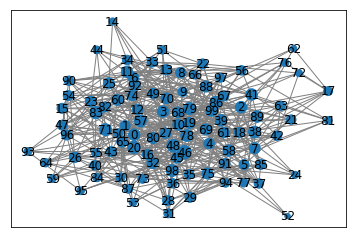

In [38]:
nx.draw_networkx(G_hat2,edge_color='grey',node_size=[10*G.degree[i] for i in range(n)])
plt.show()

In [39]:
F12=F1s.F1(G,G_hat2,n,TP1=0,TN1=0,FP1=0,FN1=0)
F12

1.0

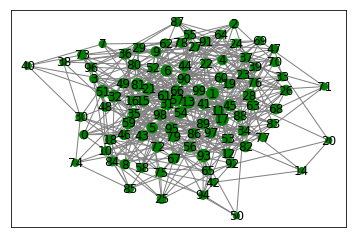

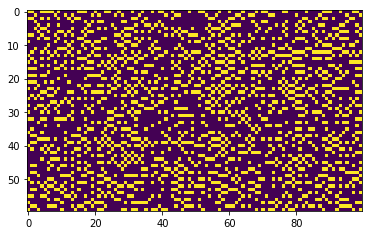

F11:1.0,F12:0.982646420824295


(1.0, 0.982646420824295)

In [40]:
n=100
G=generateG(n)
nx.draw_networkx(G,node_color='green',edge_color='grey',node_size=[10*G.degree[i] for i in range(n)])
plt.show()

M=20000
alpha=1.5
omega=1
rho0=0.3
mu=1
p3e=0.6

anre=analyzeG.analyze(G,n,alpha,omega,p3e)
beta1=anre[0]
beta2=anre[1]
twobody=anre[2]
threebody=anre[3]


PSI=getMatrix.getPSI(M,n,G,threebody,beta1,beta2,mu,rho0,t=0)
plt.imshow(PSI[0:60,:])
plt.show()

import reconstruct_index
reconstruct_index.construct(PSI,M,n,alpha,omega,rho0,mu,p3e,G)

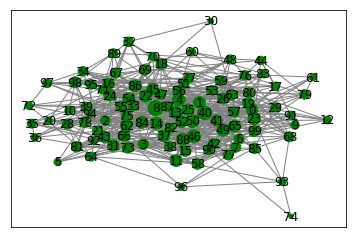

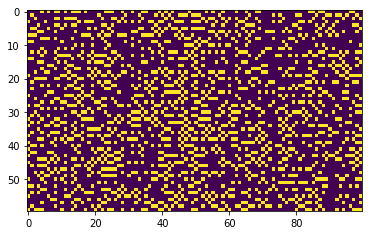

F11:0.98046875,F12:0.9601593625498008


In [6]:
n=100
G=generateG(n)
nx.draw_networkx(G,node_color='green',edge_color='grey',node_size=[10*G.degree[i] for i in range(n)])
plt.show()

M=20000
alpha=1.5
omega=1
rho0=0.3
mu=1
p3e=0.6
rho=0.3

import getMatrix
import reconstruct_rho
reconstruct_rho.constructrho(M,n,alpha,omega,rho0,mu,p3e,G,rho)

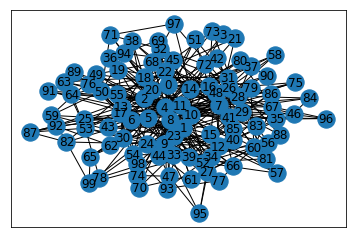

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

n=100 #Number of nodes
m=4 #Number of initial links
seed=100
G=nx.barabasi_albert_graph(n, m, seed)
nx.nx.draw_networkx(G)
plt.show()

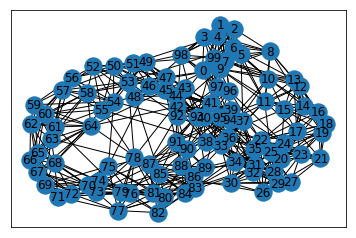

(12.0, 32.49)

In [8]:
n=100
ws = nx.watts_strogatz_graph(n, 12,0.1)
nx.draw_networkx(ws)
plt.show()

G=ws
k1=sum([G.degree[i] for i in range(n)])/n

clique=list(nx.enumerate_all_cliques(G))
#n=G.number_of_nodes()
N=len(clique)
twobody=[]
threebody=[]
for i in range(N):
    if len(clique[i])==2:
        twobody.append(clique[i])
    elif len(clique[i])==3:
        threebody.append(clique[i])

d2=[0 for i in range(n)]
for i in range(n):
    for j in range(len(threebody)):
        if i in threebody[j]:
            d2[i]=d2[i]+1
k2=np.mean(d2)
k1,k2

In [9]:
k1,k2

(12.0, 36.93)

In [13]:
k2l=[]
for ii in range(1000):
    n=100
    z = [12 for i in range(n)]
    G = nx.expected_degree_graph(z)
    k1=sum([G.degree[i] for i in range(n)])/n

    clique=list(nx.enumerate_all_cliques(G))
    #n=G.number_of_nodes()
    N=len(clique)
    twobody=[]
    threebody=[]
    for i in range(N):
        if len(clique[i])==2:
            twobody.append(clique[i])
        elif len(clique[i])==3:
            threebody.append(clique[i])

    d2=[0 for i in range(n)]
    for i in range(n):
        for j in range(len(threebody)):
            if i in threebody[j]:
                d2[i]=d2[i]+1
    k2=np.mean(d2)
    k2l.append(k2)
np.mean(k2l)

8.36925

In [1]:
[[0.35714286 0.59325044 0.75409836 0.86432161 0.89411765 0.94230769
  0.97026604 0.97026604 0.95389507 0.98613251]
 [0.33045623 0.42715232 0.61954887 0.7503268  0.87371134 0.91336634
  0.92944039 0.94939759 0.96305125 0.98716453]
 [0.22657952 0.36511628 0.44604317 0.62305296 0.7098831  0.82146341
  0.87428571 0.89833641 0.92446043 0.92420091]] [[0.25065274 0.28645833 0.47685185 0.70216963 0.76779026 0.81441441
  0.84561404 0.879046   0.88474576 0.91598023]
 [0.13333333 0.24291498 0.39852399 0.5451505  0.72937771 0.84503311
  0.89987326 0.91791045 0.93887531 0.94787879]
 [0.0625     0.105939   0.23283582 0.36289222 0.50063532 0.59574468
  0.68080357 0.75920084 0.77927461 0.81963928]]

SyntaxError: invalid syntax (<ipython-input-1-6f121d315f04>, line 1)

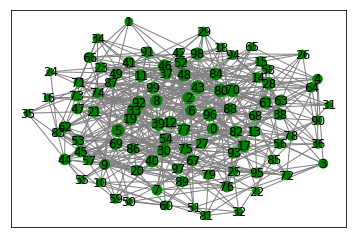

In [17]:
import generator
n=100
G=generator.generateG(n)
nx.draw_networkx(G,pos=nx.kamada_kawai_layout(G),node_color='green',edge_color='grey',node_size=[10*G.degree[i] for i in range(n)])

In [19]:
nx.kamada_kawai_layout(G)

{0: array([ 0.19920616, -0.10044121]),
 1: array([-0.34378253,  1.        ]),
 2: array([0.04296942, 0.21456762]),
 3: array([ 0.91365782, -0.45787888]),
 4: array([0.87687904, 0.40929011]),
 5: array([-0.41345691, -0.11702668]),
 6: array([0.05836106, 0.08659242]),
 7: array([-0.16185042, -0.72871109]),
 8: array([-0.16613577,  0.1880183 ]),
 9: array([-0.50115031, -0.46820845]),
 10: array([-0.52800531, -0.65004617]),
 11: array([-0.26581128,  0.44358106]),
 12: array([-0.0754414 , -0.03394944]),
 13: array([ 0.46963655, -0.12644118]),
 14: array([0.49125204, 0.4253233 ]),
 15: array([0.50957913, 0.58902579]),
 16: array([-0.8665585 ,  0.22057722]),
 17: array([ 0.40123134, -0.27580994]),
 18: array([0.25215561, 0.73470842]),
 19: array([-0.33441162,  0.00181147]),
 20: array([-0.29440783, -0.52834373]),
 21: array([-0.57024648,  0.07672323]),
 22: array([ 0.48181992, -0.74229126]),
 23: array([-0.52769403,  0.52927701]),
 24: array([-0.85143319,  0.48235241]),
 25: array([ 0.3330853

In [20]:
nx.kamada_kawai_layout(G)

{0: array([ 0.19920616, -0.10044121]),
 1: array([-0.34378253,  1.        ]),
 2: array([0.04296942, 0.21456762]),
 3: array([ 0.91365782, -0.45787888]),
 4: array([0.87687904, 0.40929011]),
 5: array([-0.41345691, -0.11702668]),
 6: array([0.05836106, 0.08659242]),
 7: array([-0.16185042, -0.72871109]),
 8: array([-0.16613577,  0.1880183 ]),
 9: array([-0.50115031, -0.46820845]),
 10: array([-0.52800531, -0.65004617]),
 11: array([-0.26581128,  0.44358106]),
 12: array([-0.0754414 , -0.03394944]),
 13: array([ 0.46963655, -0.12644118]),
 14: array([0.49125204, 0.4253233 ]),
 15: array([0.50957913, 0.58902579]),
 16: array([-0.8665585 ,  0.22057722]),
 17: array([ 0.40123134, -0.27580994]),
 18: array([0.25215561, 0.73470842]),
 19: array([-0.33441162,  0.00181147]),
 20: array([-0.29440783, -0.52834373]),
 21: array([-0.57024648,  0.07672323]),
 22: array([ 0.48181992, -0.74229126]),
 23: array([-0.52769403,  0.52927701]),
 24: array([-0.85143319,  0.48235241]),
 25: array([ 0.3330853